## [문제129] 2013 ~ 2016년도까지 성별 출생 현황을 막대그래프로 시각화해주세요.

In [10]:
# 라이브러리 불러오기

import matplotlib.pyplot as plt 

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/windows/fonts/malgun.ttf").get_name()
rc('font',family=font_name)

import pandas as pd 
from pandas import DataFrame, Series
import matplotlib as mpl
import os 

In [21]:
df = DataFrame(columns=['년도','여자','남자']) # df 선언

for i in range(2013,2017):
    file  = 'c:/data/yob{}.txt'.format(i)
    if os.path.exists(file):
        temp = pd.read_csv(file,names=['name','gender','birth'])
        x = temp['birth'].groupby(temp['gender']).sum()
        df = df.append({'년도':i, '여자':x.loc['F'], '남자':x.loc['M']},
                       ignore_index=True)
    else: 
        print(file,'파일이 없습니다.')

C:\Users\82108\AppData\Local\Temp\ipykernel_18324\186830828.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'년도':i, '여자':x.loc['F'], '남자':x.loc['M']},
C:\Users\82108\AppData\Local\Temp\ipykernel_18324\186830828.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'년도':i, '여자':x.loc['F'], '남자':x.loc['M']},
C:\Users\82108\AppData\Local\Temp\ipykernel_18324\186830828.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'년도':i, '여자':x.loc['F'], '남자':x.loc['M']},
C:\Users\82108\AppData\Local\Temp\ipykernel_18324\186830828.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'년도

In [22]:
df

,년도,여자,남자
0,2013,1749061,1885683
1,2014,1779496,1913434
2,2015,1776538,1907211
3,2016,1756647,1880674


In [24]:
# ! : 단위 값이 너무 커서 값이 이상하게 나온다
df.set_index('년도',inplace=True) # 년도를 인덱스로 내려서 해결하자

df

C:\Users\82108\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


,여자,남자
년도,,
2013,1749061,1885683
2014,1779496,1913434
2015,1776538,1907211
2016,1756647,1880674


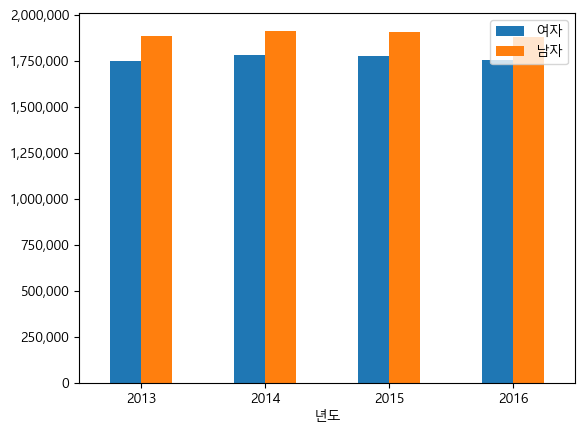

In [27]:
ax = df.plot(kind = 'bar')
plt.xticks(rotation = 0) # rotation (index 각도 조절)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) #{x:,.0f} 안하면 소숫점도 같이 나옴 

# line plot : 선그래프 
- 시간, 순서 등에 따라 어떻게 변하는지를 보여주는 그래프

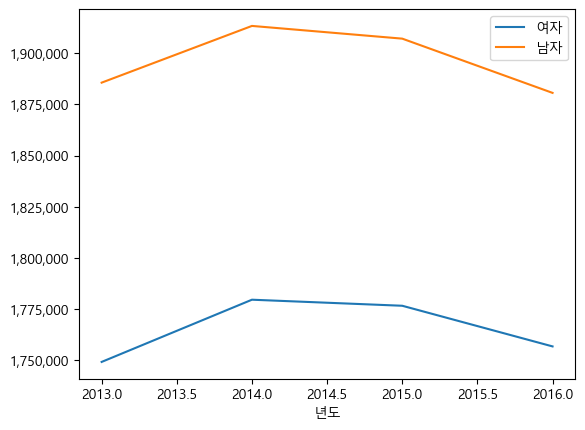

In [32]:
# 남녀 연도별 출생 수를 라인 차트로 시각화 해주세요 

ax = df.plot(kind = 'line')
plt.xticks(rotation = 0) # rotation (index 각도 조절)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) #{x:,.0f} 안하면 소숫점도 같이 나옴 

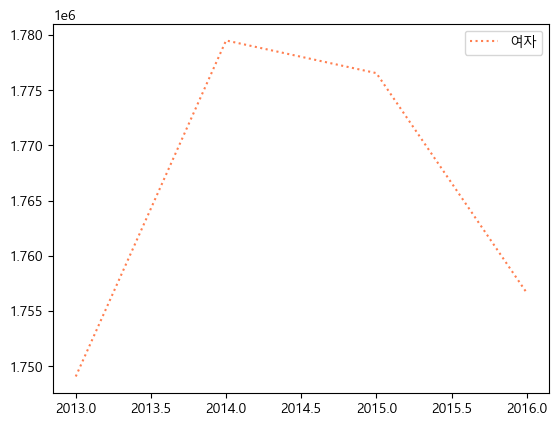

In [49]:
# 같이 드래그 하면 한 화면에 출력이 됨 

ax = plt.plot(df.index, df.여자, label = '여자', color = 'coral', linestyle = ':') # :은 실선을 표현함
plt.legend() # 범례 

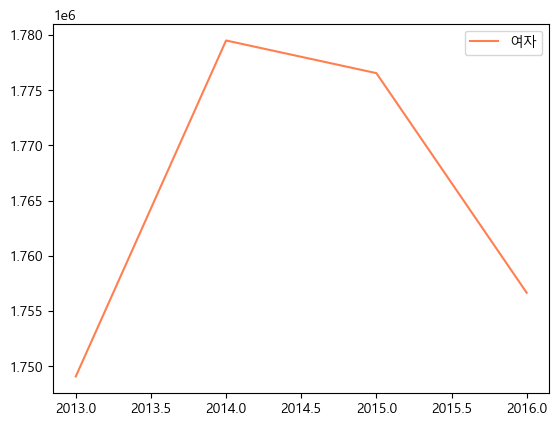

In [48]:
# 혹은 linestyle 안에 선 타입을 넣어줄 수 있음

plt.plot(df.index,df.여자,label="여자",color='coral',linestyle= 'solid') 
plt.legend() # 범례 

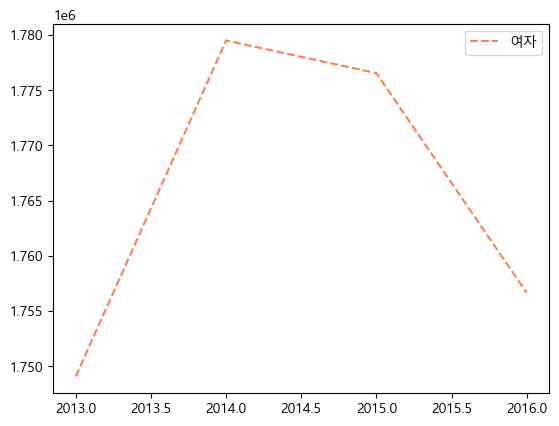

In [47]:
plt.plot(df.index,df.여자,label="여자",color='coral',linestyle= 'dashed')
plt.legend() # 범례 

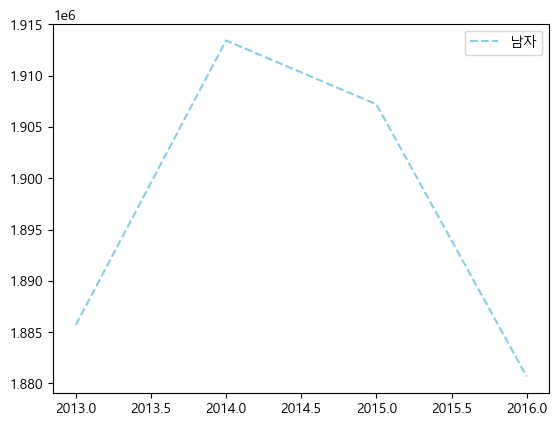

In [46]:
plt.plot(df.index,df.남자,label="남자",color='skyblue',linestyle='--') # :(실선)
plt.legend() # 범례 

## [문제 130] 년도별 입사 인원수를 bar plot, line plot을 생성해주세요.


<AxesSubplot: xlabel='HIRE_DATE'>

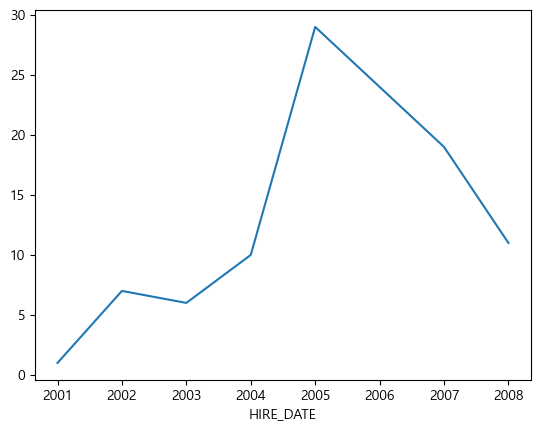

In [52]:
# solution 1 : line plot 

emp = pd.read_csv("c:/data/employees.csv")

years = emp.EMPLOYEE_ID.groupby(pd.to_datetime(emp.HIRE_DATE).dt.year).count()

years.plot()

Text(2003, 29, '오늘 하루도 행복하자')

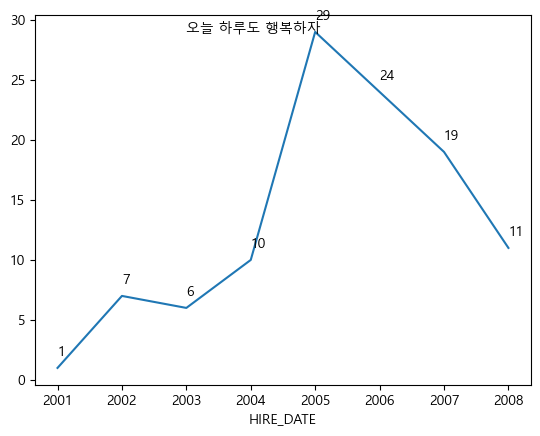

In [65]:
# 값을 추가하기 

years.plot()

idx = 2001 
for i in years:
    plt.text(idx, i+1, i) # x축 = idx, y축 = i, values = i
    idx += 1 
    
plt.text(2003, 29, "오늘 하루도 행복하자") # 그래프 내에서 글자 새기기 

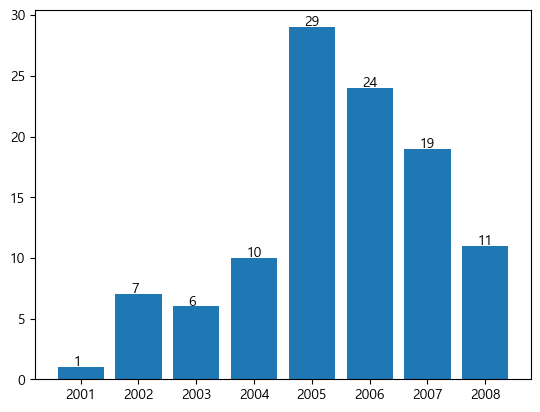

In [74]:
# solution 2: bar plot 
## for 문을 활용해서 값 찍기

plt.bar(years.index, years)

idx = 2001 
for i in years:
    plt.text(idx-0.13, i+0.1, i)
    idx += 1 


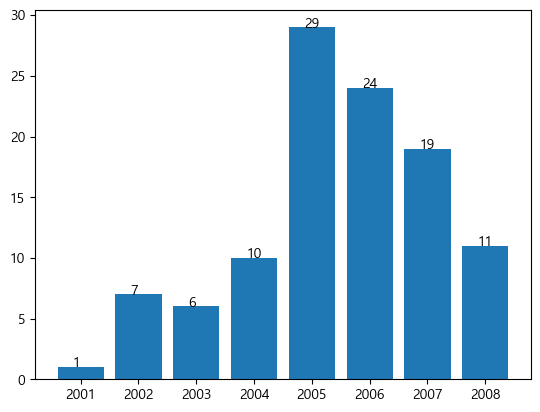

In [75]:
## 좌표를 활용해서 값 찍기 

ax = plt.bar(years.index, years)

for i in ax.patches:
    left, bottom, width, height = i.get_bbox().bounds
    plt.text(left+width/3, height, int(height))

**색 설정하기**

<BarContainer object of 8 artists>

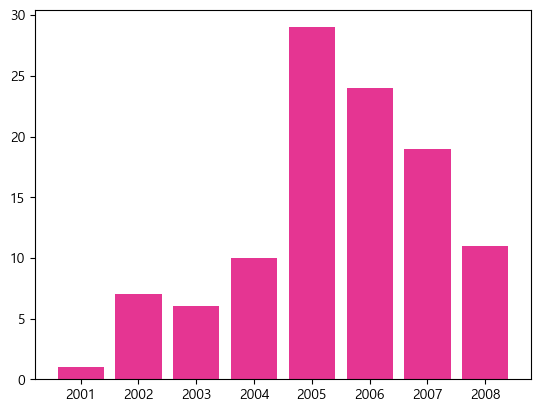

In [77]:
cmap = plt.get_cmap('PuRd')
cmap(0)
plt.bar(years.index, years, color=cmap(0.6)) 

<BarContainer object of 8 artists>

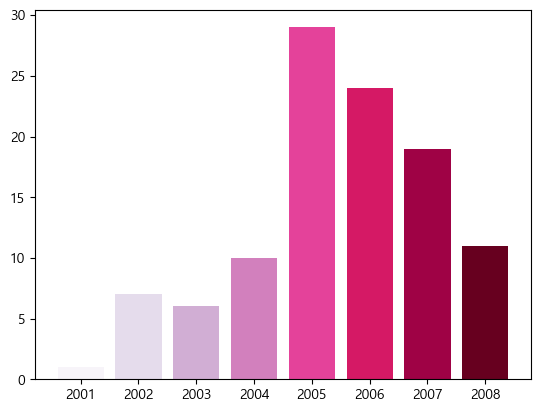

In [79]:
import numpy as np 

colors = [cmap(i) for i in np.linspace(0,1,8)] # np.linespace : 난수 값을 생성하는 함수

plt.bar(years.index, years, color = colors) # 난수 분리를 통해 값을 8개로 분리시켰기 때문에 아래와 같은 시각화가 생성된다 

## [문제 132] 코로나 바이러스 데이터에서 가장 최근 국가별 확진자, 사망자, 회복자 수를 구한 후 확진자 수로 내림차순 정렬해주세요



In [83]:
covid = pd.read_csv("c:/data/covid_19_clean_complete.csv")
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [85]:
covid.Date = pd.to_datetime(covid.Date)
covid.Date.min() # 가장 처음 입력된 날짜 확인 

Timestamp('2020-01-22 00:00:00')

In [86]:
# step 1 : 가장 최근 날짜 정보만 뽑아내기 

lately_covid = covid[covid.Date == covid.Date.max()]
lately_covid

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [88]:
# step2 : 특정 국가 데이터 찾아보기 
lately_covid[lately_covid['Country/Region'].str.lower().str.contains('korea')] # 한국 데이터만 찾아보기 

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48948,NaN,South Korea,35.907757,127.766922,2020-07-27,14203,300,13007,896,Western Pacific


In [90]:
# step 3 : 집계하기 

result = lately_covid.groupby('Country/Region').aggregate({'Confirmed':'sum',
                                                          'Deaths':'sum',
                                                          'Recovered':'sum'})
result

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,36263,1269,25198
Albania,4880,144,2745
Algeria,27973,1163,18837
Andorra,907,52,803
Angola,950,41,242
...,...,...,...
West Bank and Gaza,10621,78,3752
Western Sahara,10,1,8
Yemen,1691,483,833


In [91]:
# step 4 : 내림차순 해서 알아보기 (가장 많은 사람이 감연된 국가 순으로 정렬)

result.sort_values(by = 'Confirmed', ascending = False)

,Confirmed,Deaths,Recovered
Country/Region,,,
US,4290259,148011,1325804
Brazil,2442375,87618,1846641
India,1480073,33408,951166
Russia,816680,13334,602249
South Africa,452529,7067,274925
...,...,...,...
Dominica,18,0,18
Saint Kitts and Nevis,17,0,15
Greenland,14,0,13


## [문제 133] 가장 최근 국가별 확진자 수가 가장 많은 10개의 국가의 확진자수, 사망자수, 회복자수를 그룹형 막대그래프로 시각화 하세요

In [93]:
result['rank'] = result.Confirmed.rank(ascending = False, method = 'dense').astype('int')
top_10 = result[result['rank'] <= 10].sort_values(by = 'rank')
top_10

,Confirmed,Deaths,Recovered,rank
Country/Region,,,,
US,4290259,148011,1325804,1
Brazil,2442375,87618,1846641,2
India,1480073,33408,951166,3
Russia,816680,13334,602249,4
South Africa,452529,7067,274925,5
Mexico,395489,44022,303810,6
Peru,389717,18418,272547,7
Chile,347923,9187,319954,8
United Kingdom,301708,45844,1437,9


<AxesSubplot: xlabel='Country/Region'>

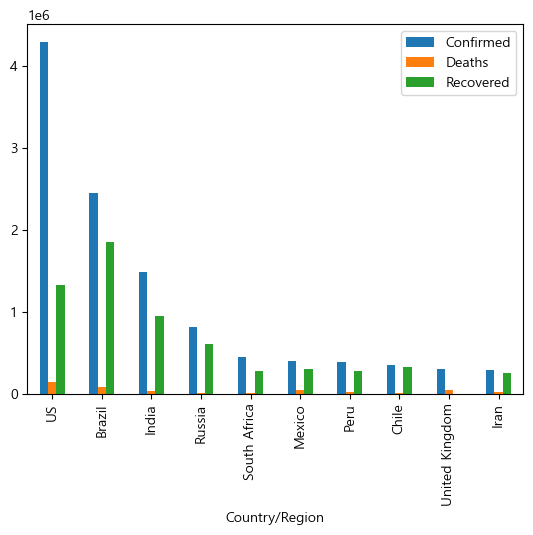

In [97]:
top_10.iloc[:,:-1].plot(kind='bar') # rank는 제거해야 함 

## [문제 134] 날짜별 확진자수, 사망자수, 회복자수를 꺾은선 그래프로 시각화하세요

In [101]:
covid['Date'] = pd.to_datetime(covid['Date'])
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [102]:
covid_date = covid.groupby('Date').aggregate({'Confirmed':'sum',
                                             'Deaths' : 'sum',
                                             'Recovered' : 'sum'})

covid_date

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52
...,...,...,...
2020-07-23,15510481,633506,8710969
2020-07-24,15791645,639650,8939705
2020-07-25,16047190,644517,9158743


<AxesSubplot: xlabel='Date'>

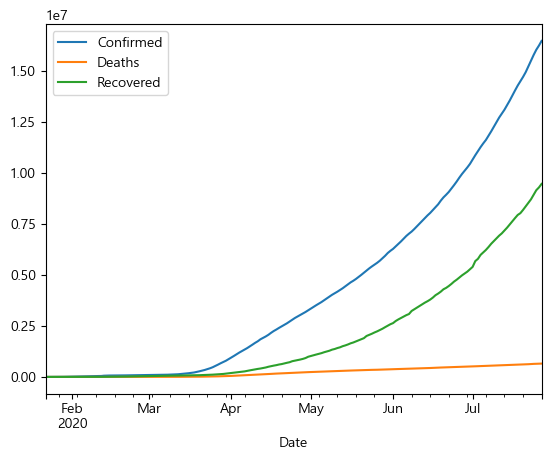

In [104]:
covid_date.plot()

(array([18283, 18293, 18322, 18353, 18383, 18414, 18444, 18470],
       dtype=int64),
 [Text(18283, 0, '2020-01'),
  Text(18293, 0, '2020-02'),
  Text(18322, 0, '2020-03'),
  Text(18353, 0, '2020-04'),
  Text(18383, 0, '2020-05'),
  Text(18414, 0, '2020-06'),
  Text(18444, 0, '2020-07'),
  Text(18470, 0, '2020-07')])

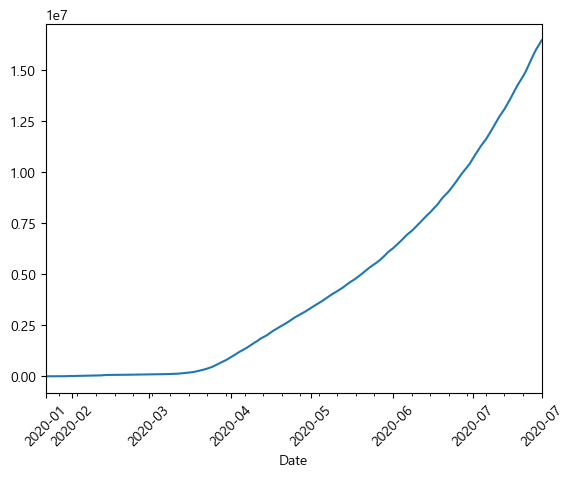

In [106]:
# x축에 대한 format을 바꾸고 싶을 때 

import matplotlib.ticker as ticker 
from matplotlib.dates import DateFormatter 

## 주의 : 축에 대한 index가 날짜로 되어있어야 한다. 그렇지 않을 경우 현재 날짜가 잘못 나오게 된다.
ax = covid_date['Confirmed'].plot()
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.xticks(rotation = 45)

(array([18280., 18300., 18320., 18340., 18360., 18380., 18400., 18420.,
        18440., 18460., 18480.]),
 [Text(18280.0, 0, '2020-01-19'),
  Text(18300.0, 0, '2020-02-08'),
  Text(18320.0, 0, '2020-02-28'),
  Text(18340.0, 0, '2020-03-19'),
  Text(18360.0, 0, '2020-04-08'),
  Text(18380.0, 0, '2020-04-28'),
  Text(18400.0, 0, '2020-05-18'),
  Text(18420.0, 0, '2020-06-07'),
  Text(18440.0, 0, '2020-06-27'),
  Text(18460.0, 0, '2020-07-17'),
  Text(18480.0, 0, '2020-08-06')])

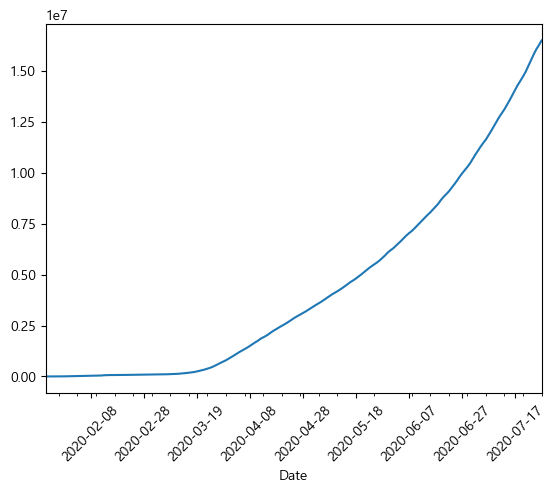

In [111]:
## ticker.MultipleLocator(x) : x 간격으로 날짜를 찍을 때 사용

ax = covid_date['Confirmed'].plot()
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.xticks(rotation = 45)

# 지도로 시각화 하기 

In [112]:
lately_covid.Lat # 위도
lately_covid.Long # 경도 

48807    67.709953
48808    20.168300
48809     1.659600
48810     1.521800
48811    17.873900
           ...    
49063     6.613100
49064    48.516388
49065    43.333300
49066    71.276100
49067    28.233600
Name: Long, Length: 261, dtype: float64

In [113]:
# 라이브러리 불러오기 

import folium

In [116]:
## 중심을 찍어두면 해당 반경으로 해서 보여주지만, 중심을 찍지 않으면 아무데나 튀어나와서 줌아웃 한 다음에 한국을 찾고 이런식으로 해야해서 아주 번거롭다 
m = folium.Map(location=[37.498831454024625, 127.03167254210354], zoom_start=15) # 중심을 잡아주는거

m

In [119]:
folium.Marker(location=[37.498831454024625, 127.03167254210354],
              popup = 'itwill',
              icon=folium.Icon(color='red',icon='star')
              ).add_to(m)

m.save("c:/data/map.html") # 명령 끝나면 꼭 save하기 

m